In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: edit the filename
log_filename = 'jobs/VGGNet/Pascal3D/SSD_share_pose_300x300_8_bins/VGG_Pascal3D_SSD_share_pose_300x300_8_bins.log'
iter_keyword = "Iteration "
loss_keyword = "loss = "

In [26]:
def getFirstFloat(string, use_decimal):
	continue_search = True
	decimal_found = False
	end_of_first_float = 0
	
	while continue_search and end_of_first_float < len(string):
		char = string[end_of_first_float]
		if char.isdigit() or (char == "." and use_decimal and not decimal_found):
			if char == ".":
				decimal_found = True
			end_of_first_float += 1
		else:
			continue_search = False
	
	if end_of_first_float == 0:
		return "ERROR"
	return string[0:end_of_first_float]

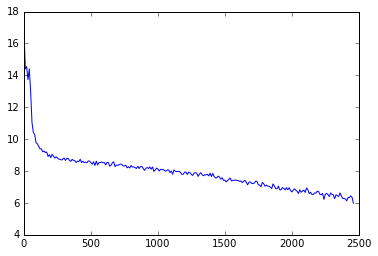

In [32]:
f = open(log_filename, "r")

points_to_plot = []
for line in f:
	iter_position = line.find(iter_keyword)
	loss_position = line.find(loss_keyword)
	if iter_position > -1 and loss_position > -1:
		iter_num = getFirstFloat(line[iter_position + len(iter_keyword):], False)
		loss_val = getFirstFloat(line[loss_position + len(loss_keyword):], True)
		if iter_num != "ERROR" and loss_val != "ERROR":
			points_to_plot.append([iter_num, loss_val])
		else:
			print "ERROR: "
			print line

#print points_to_plot
plt.plot([x[0] for x in points_to_plot], [x[1] for x in points_to_plot])
plt.show()